YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Error downloading data: unsupported format string passed to Series.__format__
Using default price.

Binomial Option Pricing Results:
Current Stock Price (S0): $150.00
Up Price (Su): $165.00
Down Price (Sd): $135.00
Strike Price (K): $157.50
Risk-neutral probability (p): 0.7564
Call payoff if up (Cu): $7.50
Call payoff if down (Cd): $0.00
Option Price (C0): $5.40


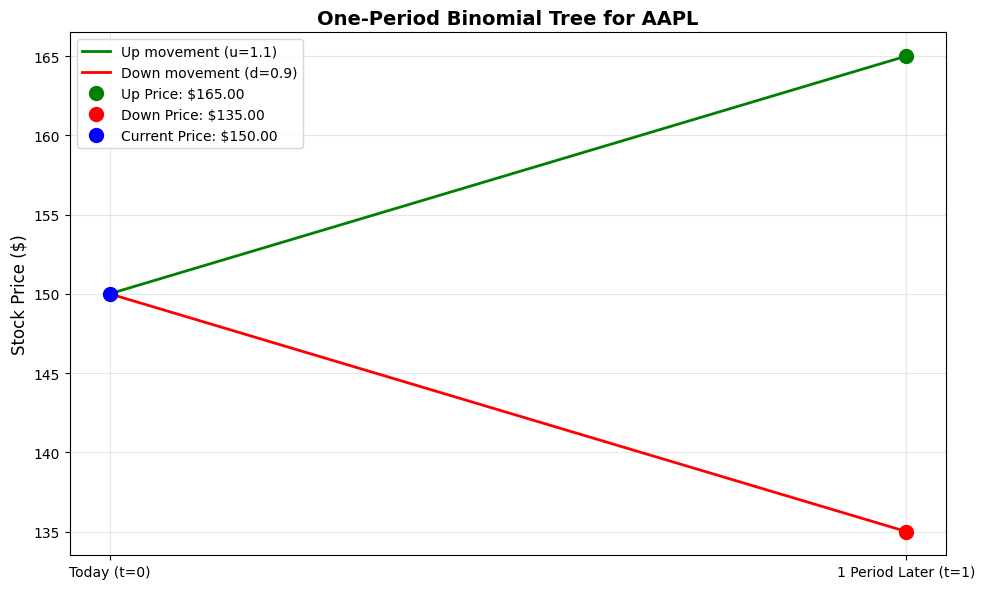


Key Variables:
S0 = 150.00
Su = 165.00
Sd = 135.00
K = 157.50
Cu = 7.50
Cd = 0.00
C0 = 5.40
p = 0.7564


In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Fetch real AAPL stock price with error handling
ticker = 'AAPL'
try:
    data = yf.download(ticker, period='5d', interval='1d')
    if data.empty:
        print(f"No data received for {ticker}. Using default price.")
        S0 = 150.0  # Default AAPL price
    else:
        S0 = data['Close'].iloc[-1]  # Use iloc instead of [] for safer indexing
        print(f"Current {ticker} price: ${S0:.2f}")
except Exception as e:
    print(f"Error downloading data: {e}")
    print("Using default price.")
    S0 = 150.0  # Default AAPL price

# Step 2: Define model parameters
u = 1.1           # Up factor
d = 0.9           # Down factor
r = 0.05          # Risk-free rate
K = S0 * 1.05     # Strike price (5% above current price)
T = 1             # 1 year
dt = 1            # one-period
discount_factor = np.exp(-r * dt)

# Step 3: Calculate possible future prices
Su = S0 * u       # Price if up
Sd = S0 * d       # Price if down

# Step 4: Risk-neutral probability
p = (np.exp(r * dt) - d) / (u - d)

# Step 5: Option payoff at maturity (Call)
Cu = max(0, Su - K)
Cd = max(0, Sd - K)

# Step 6: Backward induction to find option price
C0 = discount_factor * (p * Cu + (1 - p) * Cd)

# Step 7: Display results
print(f"\nBinomial Option Pricing Results:")
print(f"Current Stock Price (S0): ${S0:.2f}")
print(f"Up Price (Su): ${Su:.2f}")
print(f"Down Price (Sd): ${Sd:.2f}")
print(f"Strike Price (K): ${K:.2f}")
print(f"Risk-neutral probability (p): {p:.4f}")
print(f"Call payoff if up (Cu): ${Cu:.2f}")
print(f"Call payoff if down (Cd): ${Cd:.2f}")
print(f"Option Price (C0): ${C0:.2f}")

# Step 8: Visualize
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot([0, 1], [S0, Su], 'g-', lw=2, label=f'Up movement (u={u})')
ax.plot([0, 1], [S0, Sd], 'r-', lw=2, label=f'Down movement (d={d})')
ax.plot(1, Su, 'go', markersize=10, label=f'Up Price: ${Su:.2f}')
ax.plot(1, Sd, 'ro', markersize=10, label=f'Down Price: ${Sd:.2f}')
ax.plot(0, S0, 'bo', markersize=10, label=f'Current Price: ${S0:.2f}')
ax.set_title(f"One-Period Binomial Tree for {ticker}", fontsize=14, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(["Today (t=0)", "1 Period Later (t=1)"])
ax.set_ylabel("Stock Price ($)", fontsize=12)
ax.legend(fontsize=10)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the key variables
print(f"\nKey Variables:")
print(f"S0 = {S0:.2f}")
print(f"Su = {Su:.2f}")
print(f"Sd = {Sd:.2f}")
print(f"K = {K:.2f}")
print(f"Cu = {Cu:.2f}")
print(f"Cd = {Cd:.2f}")
print(f"C0 = {C0:.2f}")
print(f"p = {p:.4f}")